For Stock Market Price prediction, I am using nsepy python library for getting data of National Stock Exchange for HDFC.

Any other keyword can be use at the place of 'HDFC' for different companies.

In [1]:
import pandas as pd
import numpy as np
!pip install nsepy
from nsepy import get_history
import datetime as dt

start = dt.datetime(2014, 1, 1)

end = dt.datetime.today()

hdfc = get_history(symbol='HDFC', start = start, end = end)
#hdfc.index = pd.to_datetime(hdfc.index)
hdfc.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2014-01-01,HDFC,EQ,794.65,798.25,800.1,790.60,794.80,793.50,794.33,587564,4.667199e+13,30949,308810,0.5256
2014-01-02,HDFC,EQ,793.50,791.60,809.5,784.00,786.50,791.10,801.14,2538179,2.033431e+14,84179,1769558,0.6972
2014-01-03,HDFC,EQ,791.10,791.00,794.9,780.00,793.15,791.00,790.21,1855802,1.466481e+14,54240,1448449,0.7805
2014-01-06,HDFC,EQ,791.00,790.00,798.4,784.35,795.00,795.85,791.03,1861785,1.472734e+14,24908,1529849,0.8217
2014-01-07,HDFC,EQ,795.85,794.00,800.6,788.40,798.00,797.90,794.87,2216143,1.761543e+14,56220,1738763,0.7846


I have fetched the 'Open' prices for each date for making futher predictions.

In [2]:
hdfc_open_price = hdfc[['Open']]
hdfc_open_price.shape

(1272, 1)

In [3]:
hdfc_open_price.head()

,Open
Date,
2014-01-01,798.25
2014-01-02,791.60
2014-01-03,791.00
2014-01-06,790.00
2014-01-07,794.00


Converting dates and prices to single array of values.

In [0]:
date = []
for i in np.array(hdfc_open_price.index):
  date.append(int(i.day)) 
  
date = np.reshape(date,(len(date),1))

In [0]:
price = []
for i in hdfc_open_price.Open:
  price.append(i)

price = np.reshape(price,(len(price),1))

I have created three models and each of them are a type of Support Vector Machine.
In current case, we are trying to predict the next possible value in series which means we need to use regression and SVMs can be used for regression as well.


The Support Vector Regression is a type of SVM which uses the space between data points as the margin of error and predicts the most likely next value in series.

In [0]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [0]:
svr_len = SVR(kernel = 'linear',C = 1e3)
svr_poly = SVR(kernel = 'poly',C = 1e3, degree = 2)
svr_rbf = SVR(kernel = 'rbf',C = 1e3, gamma = 0.1)


In [24]:
svr_len.fit(date,price)
svr_poly.fit(date,price)
svr_rbf.fit(date,price)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

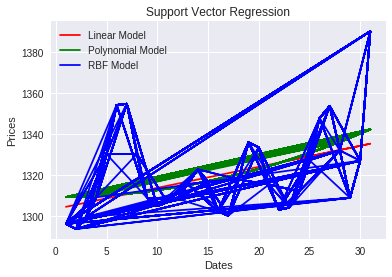

In [32]:
%matplotlib inline

#plt.scatter(date,price, color = "black", label='Data')
plt.plot(date,svr_len.predict(date),color = 'red', label = "Linear Model")
plt.plot(date,svr_poly.predict(date),color = 'green', label = "Polynomial Model")
plt.plot(date,svr_rbf.predict(date),color = 'blue', label = "RBF Model")

plt.xlabel('Dates')
plt.ylabel('Prices')

plt.title('Support Vector Regression')
plt.legend()
plt.show()


After traing the model using the Dataset, I have fetched the predicted value from each of the model.



In [28]:
svr_rbf.predict([[2]])[0]

1293.649964803604

In [30]:
svr_poly.predict([[2]])[0]

1309.2441559470785

In [29]:
svr_len.predict([[2]])[0]

1305.4499999982456